In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 500)

import keggler as kg
from helpers import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm

import gc
gc.enable()

import warnings
warnings.simplefilter(action='ignore', category=Warning)

import os, psutil
import glob

# Set up a logger to dump messages to both log file and notebook
import logging as logging
def ini_log(filename):
    logger = logging.getLogger(__name__)
    ## avoid multiple printouts due to same handlers added several times
    if not logger.handlers:
        logger.setLevel(logging.DEBUG)

        handlers = [#logging.StreamHandler(None), 
            logging.FileHandler(filename, 'a')
        ]

        fmt=logging.Formatter('%(asctime)-15s: %(levelname)s  %(message)s')
        for h in handlers:
            h.setFormatter(fmt)
            logger.addHandler(h)
    return logger
        
log = ini_log('out.log')

#PATH='data_mini/'
#prefix='_mini'

PATH='data/'
prefix=''

print(os.listdir(PATH))


['submissions', 'test_set', 'track_features', 'training_set']


In [2]:
data_path = 'data/' # point this to your data folder
trn_path = data_path + '/training_set/'

# trn_input_logs = sorted(glob.glob(trn_path + "outDD_v1*.csv.gz"))
trn_input_logs = sorted(glob.glob(trn_path + "outDD_v2*.h5"))

In [3]:
trn_input_logs[:10]

['data//training_set/outDD_v2_00.h5',
 'data//training_set/outDD_v2_01.h5',
 'data//training_set/outDD_v2_02.h5',
 'data//training_set/outDD_v2_03.h5',
 'data//training_set/outDD_v2_04.h5',
 'data//training_set/outDD_v2_05.h5',
 'data//training_set/outDD_v2_06.h5',
 'data//training_set/outDD_v2_07.h5',
 'data//training_set/outDD_v2_08.h5',
 'data//training_set/outDD_v2_09.h5']

# Read in the data

In [4]:
df_trn = pd.concat([read_log(f) for f in trn_input_logs[:10]], axis=0, ignore_index=True)
df_trn.rename({'not_skipped': 'skip_4'}, axis=1, inplace=True)
gc.collect()

from sklearn.preprocessing import LabelEncoder
df_trn['session_id'] = LabelEncoder().fit_transform(df_trn['session_id'])

In [5]:
psutil.Process(os.getpid()).memory_info().rss / 1024**2

2734.27734375

In [6]:
df_trn.memory_usage(deep=True).sum()/1024**2

2032.4732398986816

In [7]:
df_trn.dtypes

session_id                           int64
session_position                      int8
session_length                        int8
skip_1                                int8
skip_2                                int8
skip_3                                int8
skip_4                                int8
context_switch                       uint8
no_pause_before_play                  int8
short_pause_before_play               int8
long_pause_before_play                int8
hist_user_behavior_is_shuffle        uint8
hour_of_day                           int8
premium                               int8
context_type                         uint8
hist_user_behavior_reason_start       int8
hist_user_behavior_reason_end         int8
duration                           float16
release_year                         int16
us_popularity_estimate             float16
acousticness                       float16
beat_strength                      float16
bounciness                         float16
danceabilit

In [8]:
df_trn.memory_usage(deep=True)/1024**2

Index                                0.000076
session_id                         250.150543
session_position                    31.268818
session_length                      31.268818
skip_1                              31.268818
skip_2                              31.268818
skip_3                              31.268818
skip_4                              31.268818
context_switch                      31.268818
no_pause_before_play                31.268818
short_pause_before_play             31.268818
long_pause_before_play              31.268818
hist_user_behavior_is_shuffle       31.268818
hour_of_day                         31.268818
premium                             31.268818
context_type                        31.268818
hist_user_behavior_reason_start     31.268818
hist_user_behavior_reason_end       31.268818
duration                            62.537636
release_year                        62.537636
us_popularity_estimate              62.537636
acousticness                      

In [9]:
df_trn.shape

(32787732, 38)

In [10]:
df_trn.head(21)

,session_id,session_position,session_length,skip_1,skip_2,skip_3,skip_4,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence
0,0,1,20,0,0,0,1,0,0,0,0,1,16,1,1,1,1,180.125,2018,99.9375,0.015854,0.438477,0.473389,0.653320,7.660156,0.553223,1.035156,3.484726e-03,1,0.678711,-6.578125,0.546875,0,0.320557,0.069702,134.0000,4,0.152222
1,0,2,20,0,0,0,1,0,1,0,0,1,16,1,1,1,1,236.750,2018,99.8750,0.061798,0.654785,0.735840,0.877441,11.312500,0.727051,1.025391,1.192093e-07,7,0.104309,-5.320312,0.824707,1,0.131348,0.061157,130.0000,4,0.337158
2,0,3,20,0,0,0,1,0,1,0,0,1,16,1,1,1,1,231.250,2018,100.0000,0.354004,0.532227,0.540527,0.679688,8.062500,0.562988,1.029297,0.000000e+00,10,0.135742,-5.843750,0.774414,0,0.296875,0.045349,145.0000,4,0.373779
3,0,4,20,0,0,0,1,0,1,0,0,1,16,1,1,1,1,169.875,2018,100.0000,0.769043,0.641602,0.729004,0.864746,11.289062,0.529297,0.993652,6.616116e-06,1,0.103699,-7.757812,0.630859,0,0.603027,0.229980,112.0000,4,0.649414
4,0,5,20,0,0,0,1,0,1,0,0,1,16,1,1,1,1,210.500,2018,100.0000,0.006603,0.732422,0.794922,0.857910,12.179688,0.649902,1.000977,2.086163e-06,8,0.120850,-4.917969,0.759277,0,0.170166,0.240967,147.0000,4,0.652832
5,0,6,20,0,0,1,0,0,1,0,0,1,16,1,1,1,2,216.750,2018,100.0000,0.098328,0.548828,0.658203,0.596680,10.414062,0.557129,1.027344,5.960464e-08,1,0.056488,-7.523438,0.385010,1,0.440430,0.133545,133.2500,5,0.661133
6,0,7,20,1,1,1,0,0,1,0,0,1,16,1,1,2,2,186.500,2018,99.8750,0.449707,0.487793,0.608398,0.557617,9.835938,0.469238,1.033203,0.000000e+00,6,0.111328,-7.808594,0.157593,0,0.675293,0.409912,104.4375,4,0.109436
7,0,8,20,1,1,1,0,0,1,0,0,1,16,1,1,2,2,214.000,2018,97.2500,0.017624,0.649414,0.682617,0.489502,9.898438,0.715332,1.049805,2.527237e-05,1,0.114807,-6.960938,0.354248,0,0.456787,0.103699,83.0625,4,0.389893
8,0,9,20,0,1,1,0,0,1,0,0,1,16,1,1,2,2,218.250,2018,100.0000,0.030121,0.818848,0.879883,0.964355,15.039062,0.555176,1.046875,5.669594e-04,5,0.128296,-6.246094,0.857910,1,0.102722,0.049866,130.0000,4,0.338379
9,0,10,20,1,1,1,0,0,1,0,0,1,16,1,1,2,2,60.000,2018,99.9375,0.332520,0.751465,0.843262,0.914062,14.460938,0.239258,1.041016,4.131794e-04,4,0.119019,-8.593750,0.622070,1,0.355957,0.154663,100.2500,4,0.257568


# EDA

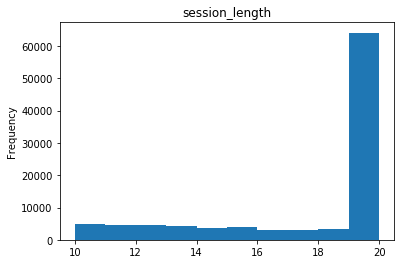

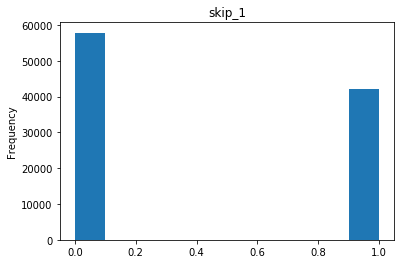

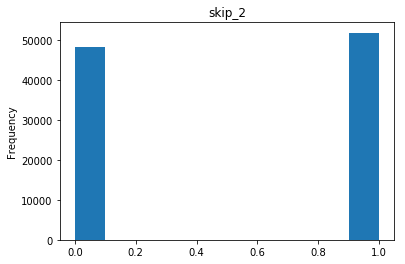

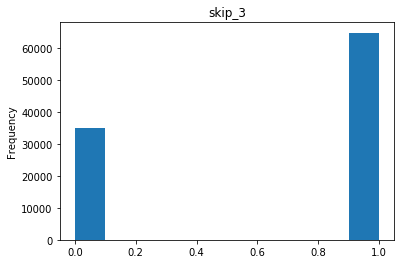

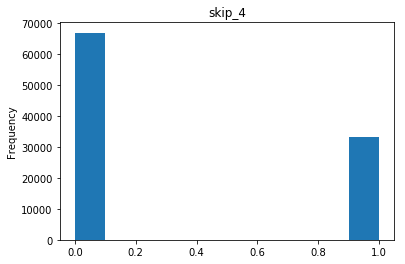

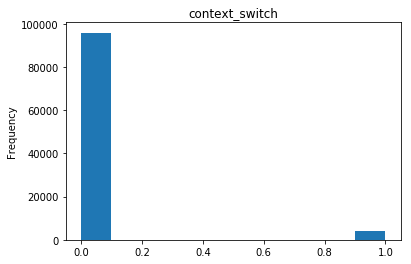

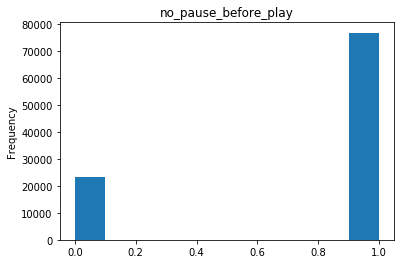

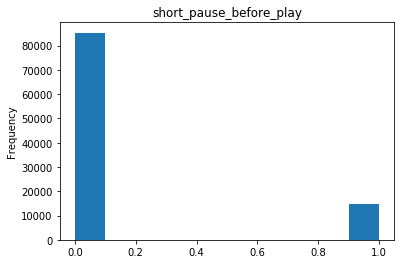

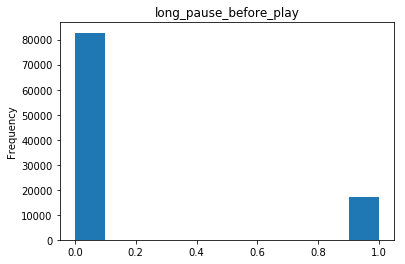

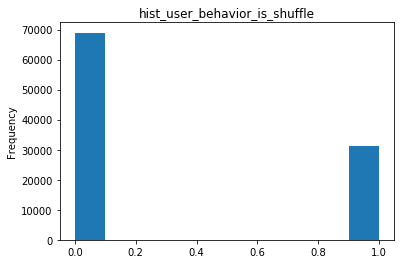

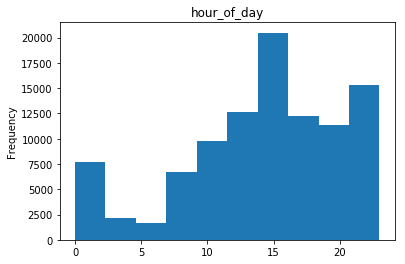

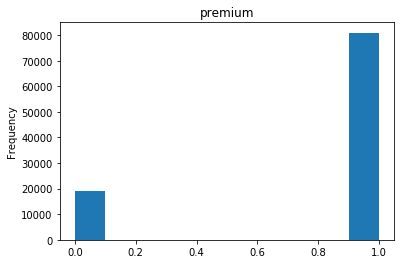

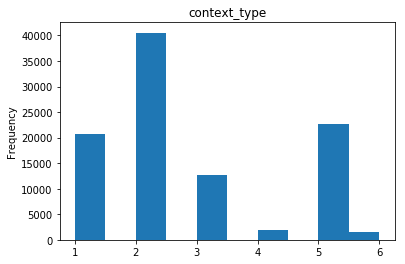

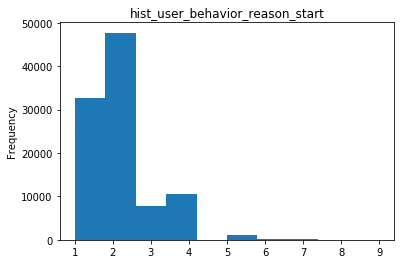

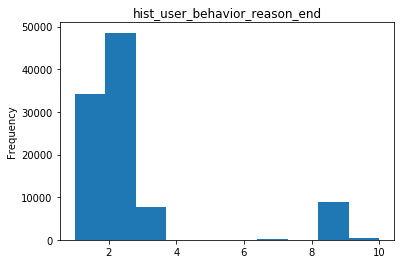

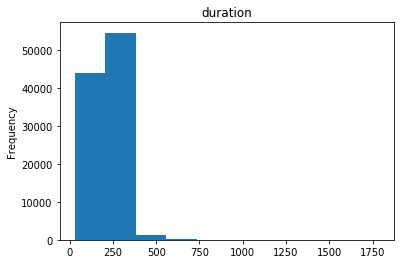

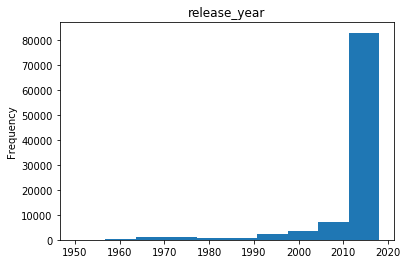

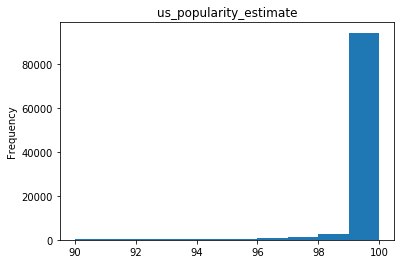

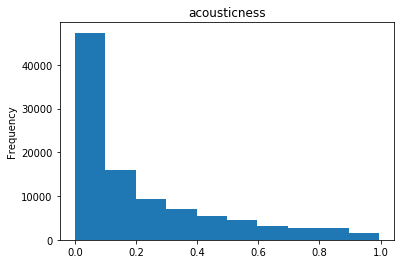

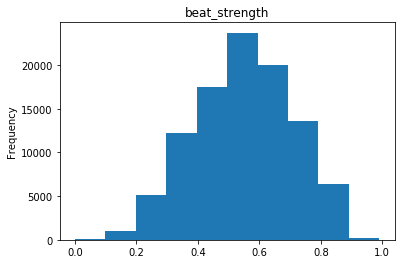

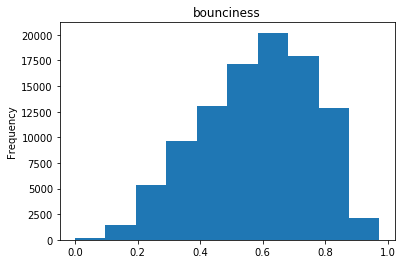

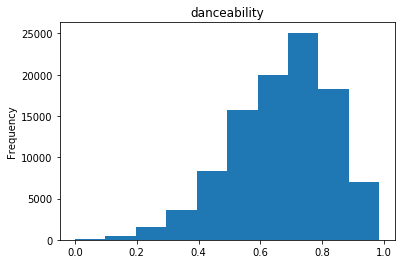

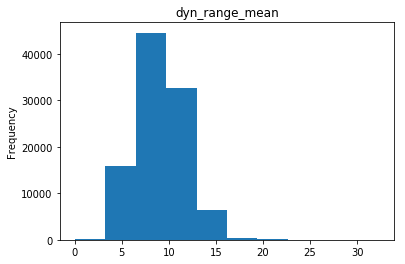

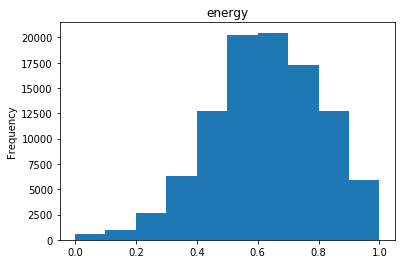

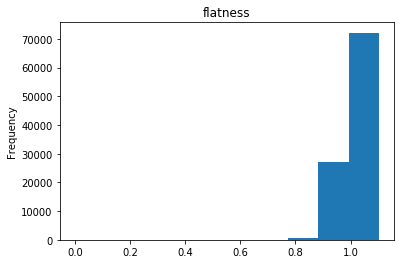

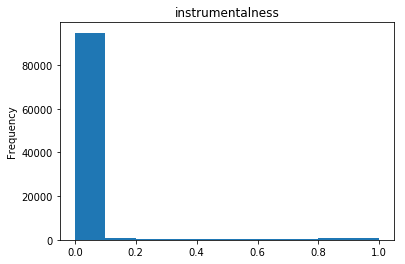

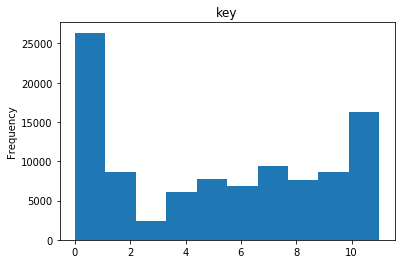

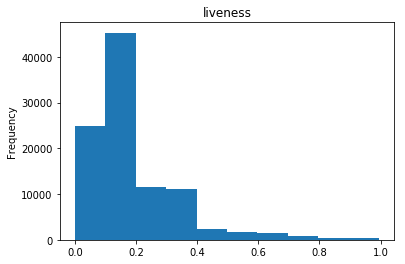

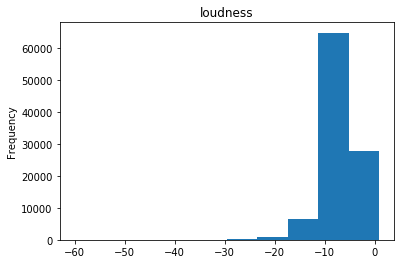

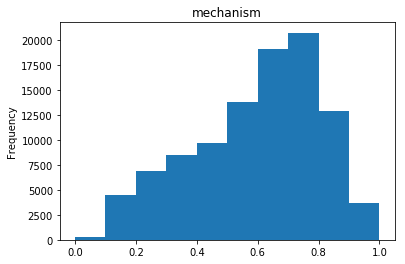

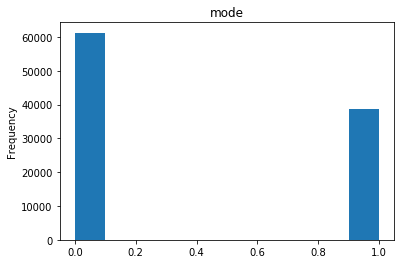

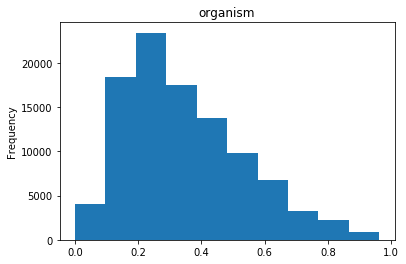

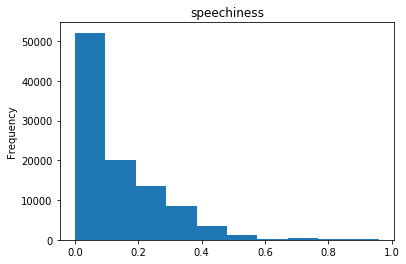

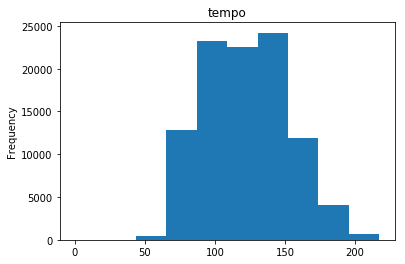

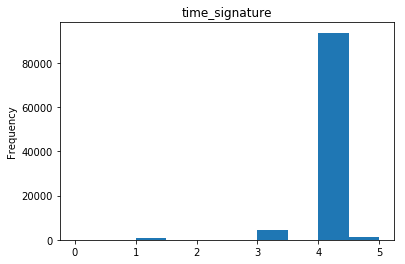

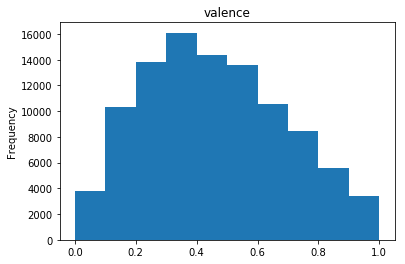

In [11]:
for c in df_trn.columns[2:]:
    df_trn[c].iloc[:100000].plot.hist()
    plt.yscale('linear')
    plt.title(c)
    plt.show()

# X / y split

In [12]:
df_trn.columns

Index(['session_id', 'session_position', 'session_length', 'skip_1', 'skip_2',
       'skip_3', 'skip_4', 'context_switch', 'no_pause_before_play',
       'short_pause_before_play', 'long_pause_before_play',
       'hist_user_behavior_is_shuffle', 'hour_of_day', 'premium',
       'context_type', 'hist_user_behavior_reason_start',
       'hist_user_behavior_reason_end', 'duration', 'release_year',
       'us_popularity_estimate', 'acousticness', 'beat_strength', 'bounciness',
       'danceability', 'dyn_range_mean', 'energy', 'flatness',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mechanism', 'mode',
       'organism', 'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

User level (already in `last`):  `'hour_of_day', 'premium'`
 
 Median: `'duration', 'release_year', 'us_popularity_estimate', 
 'context_type', 'hist_user_behavior_reason_start',
       'hist_user_behavior_reason_end'`

In [13]:
X_trn, y_trn, X_trk = get_XY(df_trn.iloc[:], aggs, reset_index=True, 
                      list_musik_qualities_=list_musik_qualities,#['valence'], 
                      aggs_music_qualities_=aggs_music_qualities,
                       i_=list(range(5)))
gc.collect()

672

In [14]:
psutil.Process(os.getpid()).memory_info().rss / 1024**2

8583.5703125

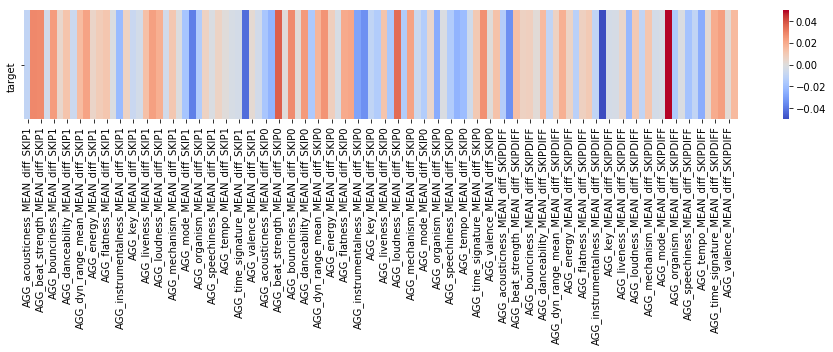

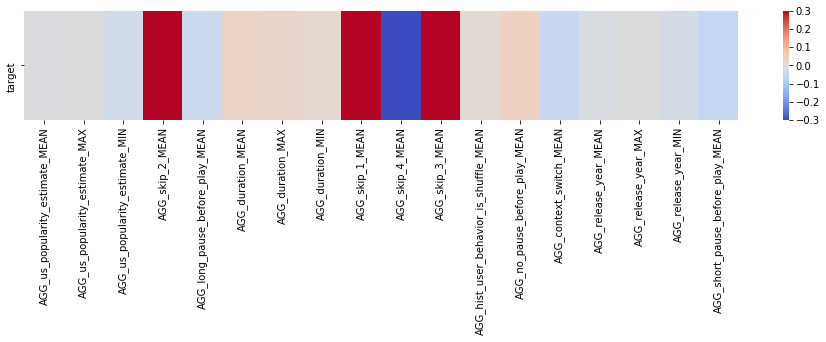

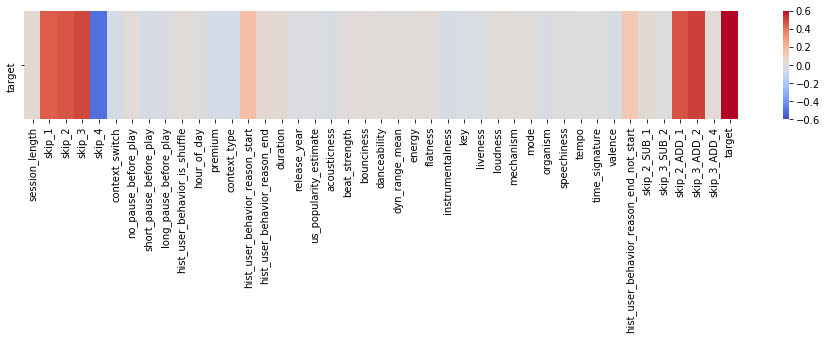

In [15]:
XY_corr = pd.concat([X_trn,X_trk[0],y_trn[0].rename('target')], axis=1).iloc[:10000].corr()
for cols, (vmin,vmax) in [
    ([c for c in XY_corr.columns if '_SKIP' in c],(-0.05, 0.05)),
    ([c for c in XY_corr.columns if '_SKIP' not in c and c.startswith('AGG_')],(-0.30,0.30)),
    ([c for c in XY_corr.columns if not c.startswith('AGG_')], (-0.6,0.6)),
]:
    _ = plt.figure(figsize=(16,2))
    _ = sns.heatmap(XY_corr[['target']].loc[cols,:].T, vmax=vmax, vmin=vmin, cmap='coolwarm')


In [16]:
y_competition_truth = get_y_truth(df_trn)

100%|██████████| 1965033/1965033 [11:35<00:00, 2823.59it/s]


In [17]:
y_competition_truth = pd.Series(y_competition_truth)

In [18]:
X_trn.memory_usage(deep=True).sum()/1024**2

251.11627769470215

In [19]:
X_trk[0].memory_usage(deep=True).sum()/1024**2

809.5687255859375

# Train / early-stop split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
id_trn, id_stp, y_lists_trn, y_lists_stp = train_test_split(X_trn.index, y_competition_truth, test_size=0.10, random_state=314, shuffle=True)

# Train a baseline

In [22]:
import lightgbm as lgb
mdl = lgb.LGBMClassifier(max_depth=-1, min_child_samples=400, 
              random_state=314, silent=True, metric='None', 
              n_jobs=4, n_estimators=500, learning_rate=0.1,
              **{'colsample_bytree': 0.75, 'min_child_weight': 1, 
               'num_leaves': 20, 'subsample': 0.75}
             )

def learning_rate_decay_power_0995(current_iter):
    base_learning_rate = 0.15
    lr = base_learning_rate  * np.power(.998, current_iter)
    return lr if lr > 1e-2 else 1e-2

In [23]:
n_fit = None

In [24]:
X = pd.concat([X_trn, X_trk[0]], axis=1)
fit_params = {'eval_names': ['train', 'early_stop'],
              'eval_set': [(X.loc[id_trn,:], y_trn[0].loc[id_trn]), 
                           (X.loc[id_stp,:], y_trn[0].loc[id_stp])],
              'eval_metric': 'binary_error',
              'verbose':50, 'early_stopping_rounds':60,
              'callbacks':[lgb.reset_parameter(learning_rate=learning_rate_decay_power_0995)]}

mdl.fit(X.loc[id_trn,:].iloc[:n_fit], y_trn[0].loc[id_trn].iloc[:n_fit], **fit_params)

prob_pred = mdl.predict_proba(X.loc[id_stp,:])[:,1]
evaluate_model(prob_pred>0.55, y_lists_stp)

Training until validation scores don't improve for 60 rounds.
[50]	train's binary_error: 0.221415	early_stop's binary_error: 0.222184
[100]	train's binary_error: 0.220166	early_stop's binary_error: 0.221385
[150]	train's binary_error: 0.219568	early_stop's binary_error: 0.221085
[200]	train's binary_error: 0.219219	early_stop's binary_error: 0.220733
[250]	train's binary_error: 0.2188	early_stop's binary_error: 0.220535
Early stopping, best iteration is:
[235]	train's binary_error: 0.218918	early_stop's binary_error: 0.220464


(0.5568270071201544, 0.7781317428652852)

The list of features with 0 importance: 
['mode']


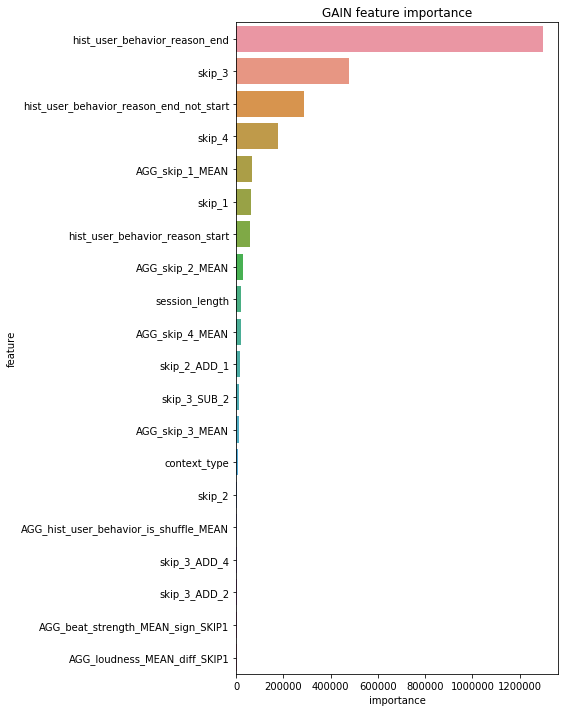

In [25]:
kg.display_importances(pd.DataFrame({'feature': X.columns,
                                  'importance': mdl.booster_.feature_importance('gain')}),
                    n_feat=20,
                    title='GAIN feature importance',
                    fout_name='feature_importance_gain.png',   
                    dump_strs=[])

# Make models for each song iteration

In [26]:
fit_params = {'eval_names': ['train', 'early_stop'],
              'eval_metric': 'binary_error',
              'verbose':10, 'early_stopping_rounds':60,
              'callbacks':[lgb.reset_parameter(learning_rate=learning_rate_decay_power_0995)]}

l_prob = []

for i_ in list(range(5)):
    X = pd.concat([X_trn, X_trk[i_]], axis=1)
    fit_params = {'eval_names': ['train', 'early_stop'],
                  'eval_set': [(X.loc[id_trn,:], y_trn[i_].loc[id_trn]), 
                               (X.loc[id_stp,:], y_trn[i_].loc[id_stp])],
                  'eval_metric': 'binary_error',
                  'verbose':100, 'early_stopping_rounds':60,
                  'callbacks':[lgb.reset_parameter(learning_rate=learning_rate_decay_power_0995)]}

    mdl.fit(X.loc[id_trn,:].iloc[:n_fit], 
            y_trn[i_].loc[id_trn].iloc[:n_fit], 
            **fit_params)

    prob_pred = mdl.predict_proba(X.loc[id_stp,:])[:,1]

    perf = evaluate_model(prob_pred>0.55, y_lists_stp)
    print('Competition metric with a constant prediction\
            based on model trained on {}th event: AA={:.4f}, FPA={:.4f}'
          .format(i_, perf[0], perf[1])
         )
    
    import pickle
    with open('models/model_v2_m02_{}.pkl'.format(i_), 'wb') as fout:
        pickle.dump(mdl, fout)
    
    l_prob.append(prob_pred)
    gc.collect()
    print(psutil.Process(os.getpid()).memory_info().rss / 1024**2)

Training until validation scores don't improve for 60 rounds.
[100]	train's binary_error: 0.220166	early_stop's binary_error: 0.221385
[200]	train's binary_error: 0.219219	early_stop's binary_error: 0.220733
Early stopping, best iteration is:
[235]	train's binary_error: 0.218918	early_stop's binary_error: 0.220464
Competition metric with a constant prediction            based on model trained on 0th event: AA=0.5568, FPA=0.7781
6878.546875
Training until validation scores don't improve for 60 rounds.
[100]	train's binary_error: 0.296549	early_stop's binary_error: 0.296905
[200]	train's binary_error: 0.294962	early_stop's binary_error: 0.296289
[300]	train's binary_error: 0.293814	early_stop's binary_error: 0.295841
Early stopping, best iteration is:
[318]	train's binary_error: 0.293671	early_stop's binary_error: 0.295602
Competition metric with a constant prediction            based on model trained on 1th event: AA=0.5624, FPA=0.7659
6972.83203125
Training until validation scores don'

In [27]:
for i in range(len(l_prob)):
    perf = evaluate_set_of_models([p>0.50 for p in l_prob], y_lists_stp, i_2fill=i)
    print('AA={:.4f}, FPA={:.4f}: non-modeled based on {}'
          .format(perf[0], perf[1], i))

AA=0.5607, FPA=0.7795: non-modeled based on 0
AA=0.5656, FPA=0.7795: non-modeled based on 1
AA=0.5680, FPA=0.7795: non-modeled based on 2
AA=0.5704, FPA=0.7795: non-modeled based on 3
AA=0.5734, FPA=0.7795: non-modeled based on 4


# Make single model to predict for all songs

In [28]:
# X_trn, y_trn = get_XY(df_trn.iloc[:], aggs, reset_index=True, 
#                       list_musik_qualities_=list_musik_qualities,#['valence'], 
#                       aggs_music_qualities_=aggs_music_qualities,
#                        i_=0)
# X_trn, X_stp, y_trn, y_stp = train_test_split(X_trn, y_trn, test_size=0.10, random_state=314, shuffle=True)

# fit_params['eval_set'] = [(X_trn,y_trn), (X_stp,y_stp)]
# mdl.fit(X_trn.iloc[:n_fit], y_trn.iloc[:n_fit], **fit_params)

# l_prob_2 = []

# for i in range(5):
#     X_trn, y_trn = get_XY(df_trn.iloc[:], aggs, reset_index=True, 
#                       list_musik_qualities_=list_musik_qualities,#['valence'], 
#                       aggs_music_qualities_=aggs_music_qualities,
#                        i_=i)
#     X_trn, X_stp, y_trn, y_stp = train_test_split(X_trn, y_trn, test_size=0.10, random_state=314, shuffle=True)

#     prob_pred = mdl.predict_proba(X_stp)[:,1]
#     perf = evaluate_model(prob_pred>0.55, y_lists_stp)
#     print('Competition metric with a constant prediction\
#             based on model trained on {}th event: AA={:.4f}, FPA={:.4f}'
#           .format(i, perf[0], perf[1])
#          )
#     l_prob_2.append(prob_pred)

In [26]:
# for i in range(len(l_prob_2)):
#     perf = evaluate_set_of_models([p>0.50 for p in l_prob_2], y_lists_stp, i_2fill=i)
#     print('AA={:.4f}, FPA={:.4f}: non-modeled based on {}'
#           .format(perf[0], perf[1], i))